In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
#showing the use of the logistic regression model 
#note this is just the model implemented using the library
#importing the forge dataset
X , y = mglearn.datasets.make_forge()
print("Shape of X is : " , X.shape)
print("Shape of y is : " , y.shape)

Shape of X is :  (26, 2)
Shape of y is :  (26,)


In [5]:
def plt_data_points ():
    #this is to plot the training set
    pos_indices = (y == 1)
    pos_data = np.ones((0 , 2))
    neg_data = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (pos_indices[indices] == True):
            pos_data = np.vstack ((pos_data , np.array([X[indices][0] , X[indices][1]])))
        else:
            neg_data = np.vstack ((neg_data , np.array([X[indices][0] , X[indices][1]])))

    plt.plot(pos_data[: , 0] , pos_data[: , 1] , 'r^' , label = "class 1")
    plt.plot(neg_data[: , 0] , neg_data[: , 1] , 'bo' , label = "class 0")

    plt.xlabel("First feature")
    plt.ylabel("second feature")


Text(0.5,1,'Data points')

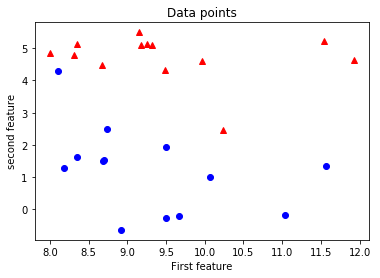

In [6]:
plt_data_points()
plt.title('Data points')

In [7]:
def plot_descision_boundary(model):
    eps = 0.5
    x_min , x_max = X[: , 0].min()-eps , X[: , 0].max() + eps
    y_min , y_max = X[: , 1].min()-eps , X[: , 1].max() + eps
    
    xx = np.linspace (x_min , x_max , 1000)
    yy = np.linspace (y_min , y_max , 1000)
    
    X1 , X2 = np.meshgrid(xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]
    descision_values = model.predict(X_grid)
    
    plt_data_points()
    plt.contourf(X1 , X2 , descision_values.reshape(X1.shape) , alpha =0.5)
    

In [8]:
#here we are not using the X_train , y_train . We are 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X , y)

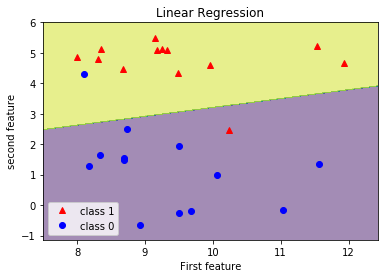

In [9]:
#plotting for the linear regression
plot_descision_boundary(lr)
plt.title('Linear Regression')
plt.legend()

In [10]:
#this is for the support vector machines
#SVC stands for Support vector classification
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X , y)

Text(0.5,1,'SVC')

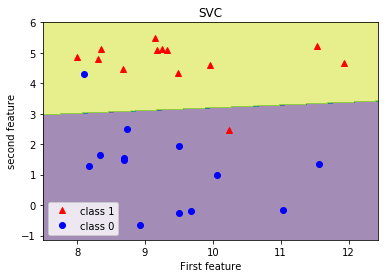

In [11]:
#much better descision boundary as expected
plot_descision_boundary(svc)
plt.legend()
plt.title('SVC')

Text(0.5,1,'C = 100')

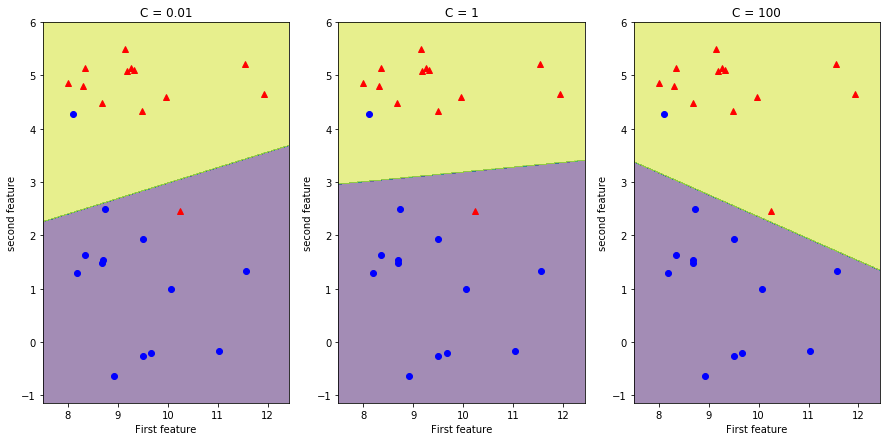

In [12]:
#when using the higher value of C , then it means lesser regularisation
#the model will try to overfit the data points
#with the lesser value of C , the model tries to find the coefficients close to zero
#when C is very large , it tries to overfit the model
svc001 = LinearSVC(C = 0.01).fit(X ,y)
svc1 = LinearSVC(C = 1).fit(X , y)
svc100 = LinearSVC(C = 100.0).fit(X ,y)

plt.figure(figsize = (15 , 7))
plt.subplot(1 , 3 ,1)
plot_descision_boundary(svc001)
plt.title('C = 0.01')
plt.subplot(1 , 3 , 2)
plot_descision_boundary(svc1)
plt.title('C = 1')
plt.subplot(1 , 3 , 3)
plot_descision_boundary(svc100)
plt.title('C = 100')

In [13]:
#putting all this on the breast cancer dataset
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target)


In [14]:
#fitting different models
lgr1 = LogisticRegression().fit(X_train , y_train)
print("Training accuracy : " , lgr1.score(X_train , y_train))
print("Test accuracy : ", lgr1.score(X_test , y_test))

#the model is performing quite well
#But since the value of training and test set accuracy model may underfit
#So using large value of C will make the model even better

Training accuracy :  0.9671361502347418
Test accuracy :  0.9440559440559441


In [15]:
lgr100 = LogisticRegression(C = 100).fit(X_train , y_train)
print("Training accuracy : " , lgr100.score(X_train , y_train))
print("Test accuracy : " , lgr100.score(X_test , y_test))

#both are falling apart so better value

Training accuracy :  0.971830985915493
Test accuracy :  0.951048951048951


In [16]:
#when using smaller value of C , the model will become more overfit
lgr001 = LogisticRegression (C = 0.01).fit(X_train , y_train)
print("Train accuracy : " , lgr001.score(X_train , y_train))
print("Test accuracy : " , lgr001.score(X_test , y_test))
#both the values decrease and still the model underfits

Train accuracy :  0.931924882629108
Test accuracy :  0.9300699300699301


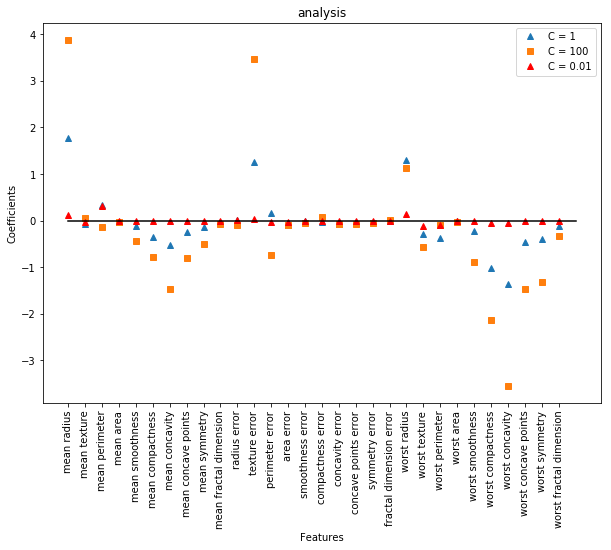

In [17]:
#plotting how the value of coefficients change with the change in C
plt.figure(figsize = (10 , 7))
plt.plot(lgr1.coef_.T , '^' , label = 'C = 1')
plt.plot(lgr100.coef_.T , 's' , label = 'C = 100')
plt.plot(lgr001.coef_.T , 'r^' , label = 'C = 0.01')
plt.legend()
plt.xticks(range(cancer.data.shape[1]) , cancer.feature_names , rotation = 90)
plt.hlines(0 , 0  , range(cancer.data.shape[1]))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('analysis')
line = np.linspace ( 0 , cancer.data.shape[1] , 100)
zeros = np.zeros (line.shape)
plt.plot(line , zeros , color = 'black')
#when c = 100 , then the regularisation is very small , so the coefficients are very scattered
#when c = 1 , then the regularisation is not that much , so the values are much close to zero
#when c = 0.01 , then the regularisation is very large , so the values are much close to zero
#the value of the third feature , change the sign , indicating that with or without regularisation , the model
#features may be indicative of the benign and malignant

In [18]:
#we can use even stronger regularisation where if c is small , the coeff are forced to become zero
l1_lgr1 = LogisticRegression(penalty = 'l1').fit(X_train , y_train)
print("Training accuracy : " , l1_lgr1.score(X_train , y_train))
print("Test accuracy : ", l1_lgr1.score(X_test , y_test))

Training accuracy :  0.9694835680751174
Test accuracy :  0.951048951048951


In [19]:
l1_lgr100 = LogisticRegression(C = 100 , penalty = 'l1').fit(X_train , y_train)
print("Training accuracy : " , l1_lgr100.score(X_train , y_train))
print("Test accuracy : ", l1_lgr100.score(X_test , y_test))

Training accuracy :  0.9906103286384976
Test accuracy :  0.958041958041958


In [20]:
l1_lgr001 = LogisticRegression(C = 0.001 , penalty = 'l1').fit(X_train , y_train)
print("Training accuracy : " , l1_lgr001.score(X_train , y_train))
print("Test accuracy : ", l1_lgr001.score(X_test , y_test))

Training accuracy :  0.9178403755868545
Test accuracy :  0.916083916083916


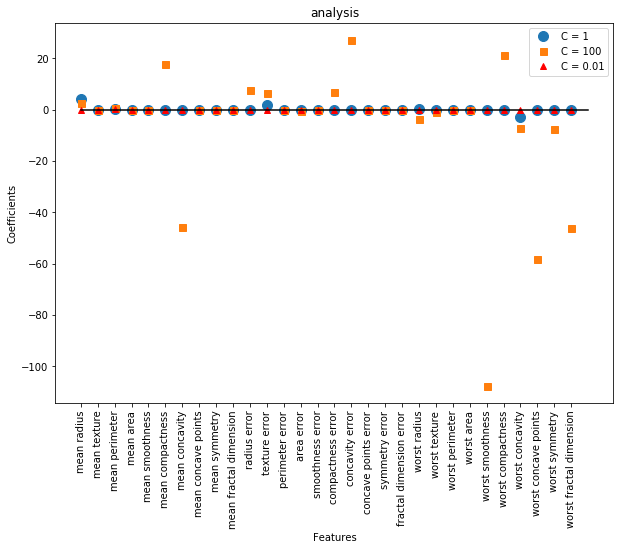

In [21]:
#plotting how the value of coefficients change with the change in C in l1 regularisation
plt.figure(figsize = (10 , 7))
plt.plot(l1_lgr1.coef_.T , 'o' , markersize= 10 , label = 'C = 1')
plt.plot(l1_lgr100.coef_.T , 's',markersize = 7 ,label = 'C = 100')
plt.plot(l1_lgr001.coef_.T , 'r^' , label = 'C = 0.01')
plt.legend()
plt.xticks(range(cancer.data.shape[1]) , cancer.feature_names , rotation = 90)
plt.hlines(0 , 0  , range(cancer.data.shape[1]))
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('analysis')
line = np.linspace ( 0 , cancer.data.shape[1] , 100)
zeros = np.zeros (line.shape)
plt.plot(line , zeros , color = 'black')
#in this if the value of c is small , means regularisation , then the value of most of the coef is zero
#as shown by the red triangle
#larger C, lesser regularisation, the coeff are larger than zero
#this model shows what are the subset of the features that should be used